In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [2]:
class Graph:
    def __init__(self):
        self.nodes = []
        
class Node:
    def __init__(self):
        self.name = ''
        self.children = []
    

In [54]:
graph = {
    "A": ["B", "C"],
    "B": ["D"],
    "C": ["D", "E"],
    "D": ["B", "C"],
    "E": ["C", "F"],
    "F": ["E", "O", "I", "G"],
    "G": ["F", "H"],
    "H": ["G"],
    "I": ["F", "J"],
    "O": ["F"],
    "J": ["K", "L", "I"],
    "K": ["J"],
    "L": ["J"],
    "P": ["Q", "R"],
    "Q": ["P", "R"],
    "R": ["P", "Q"],
}

In [87]:
"""
https://github.com/minsuk-heo/problemsolving/blob/master/graph/dfs.py
vertexList = ['0', '1', '2', '3', '4', '5', '6']
edgeList = [(0,1), (0,2), (1,0) , (1,3) , (2,0) , (2,4) , (2,5) , (3,1), (4,2) , (4,6), (5,2), (6,4)]
"""
graph = {
    "A": ["B", "C"],
    "B": ["A", "D"],
    "C": ["A", "E", "F"],
    "D": ["B"],
    "E": ["C", "G"],
    "F": ["C"],
    "G": ["E"]
}

In [88]:
# make DIY Graph
g = Graph()
for k, v in graph.items():
    n = Node()
    n.name = k
    n.children = v
    g.nodes.append(n)
g.nodes[0].name

# get edges to feed into nx
edges = []
for source in g.nodes:
    for destination in source.children:
        edges.append((source.name, destination))
        
# make NX Graph
G = nx.Graph()
G.add_nodes_from([node.name for node in g.nodes])
G.add_edges_from(edges)

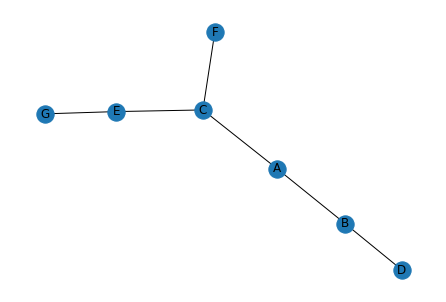

In [89]:
nx.draw(nx.Graph(G), with_labels = True)
plt.show()

**DFS** 

* Explore each branch completely before moving on to the next branch
* implement with recursion to be more elegant but can be done without
* don't need a stack or queue, that will just slow things down 
* just keep track of visited

In [57]:
%%timeit #-r 10 -n 1

visited = {}
stack = []
traversal_order = []

def dfs(graph, v):
    for node in graph.keys():
        visited[node] = False
    stack.append(v)
    while stack:
        current = stack.pop()
        visited[current]  = True
        # traversal_order.append(current)
        for adj in graph[current]:
            if visited[adj] == False:
                stack.append(adj)
            visited[adj] == True
                

dfs(graph, 'A')
# print(traversal_order)

9.8 µs ± 392 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [78]:
%%timeit 

visited = {}
traversal_order = []
# wo/QUEUE is FASTER !!

def dfs(graph, v, visited):      
    visited[v]  = True
    # traversal_order.append(v)
    for adj in graph[v]:
        if visited[adj] == False:
            dfs(graph, adj, visited)
                
for node in graph.keys():
    visited[node] = False
dfs(graph, 'A', visited)
# print(traversal_order)

3.72 µs ± 258 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


**BFS**

* explore each neighbour before going on to any of their children
* iterative solution using a QUEUE
* NOT recursive!

In [92]:
%%timeit
traversal_order = []

def bfs(graph, v):
    visited = {}
    for node in graph.keys():
        visited[node] = False
    queue = deque()
    queue.append(v)
    visited[v]  = True
    while queue:
        current = queue.popleft()
        # traversal_order.append(current)
        for adj in graph[current]: # for n in current.adjacent           
            if visited[adj] == False:
                visited[adj] = True
                queue.append(adj)
                

bfs(graph, 'A')
# print(traversal_order)

3.05 µs ± 479 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
